# **Post Test Bab 6 - Self-Organizing Maps**

*Self-organizing maps*(SOM), atau yang disebut juga dengan
topology-preserving maps, adalah sebuah algoritma klasterisasi (clustering)
sehingga termasuk pada algoritma unsupervised learning.

##Kode (Jangan diubah)
Fungsi *self-organizing maps*

In [1]:
import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min = np.argmin(d)
            centroids[min] += lrate * (x - centroids[min])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min = np.argmin(d)
        labels.append(min)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

##Soal

Gunakan dataset "Mall_Customers.csv" yang telah dilampirkan

Terdapat data Mall Segentation yang berisikan data CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Pada data tersebut, akan dilakukan klasterisasi menjadi 3 klaster dengan:
learning rate=0.1, b=0.2, dan max_epoc=3


### a) Load data

In [3]:
import pandas as pd
import numpy as np
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### b) Preprocess

In [5]:
# Mengganti nilai "Female" menjadi 0 dan "Male" menjadi 1
data['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

# Menampilkan nilai unik dari kolom "Gender"
unique_gender_values = data['Gender'].unique()

# Menampilkan lima baris pertama dari data frame
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### c) Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

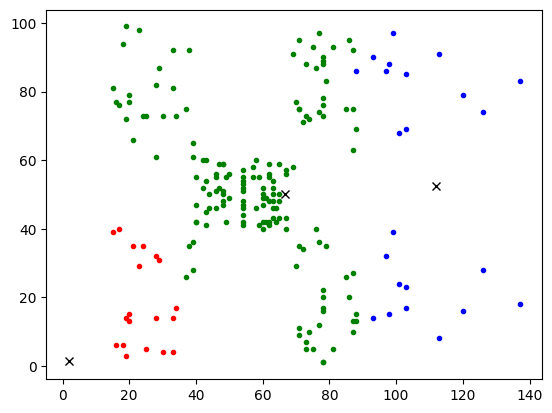

In [7]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data yang digunakan untuk klasterisasi adalah fitur "Annual Income (k$)" dan "Spending Score (1-100)"
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
print('Data:\n', X)

# Pemanggilan fungsi som() dengan parameter yang sesuai
centroids, labels = som(X, lrate=0.1, b=0.2, max_epoch=3, n_cluster=3)
print('centroid terbaru:\n', centroids)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)

# Fungsi draw() harus diimplementasikan atau diimpor
draw(X, labels, centroids)

Perbandingan Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

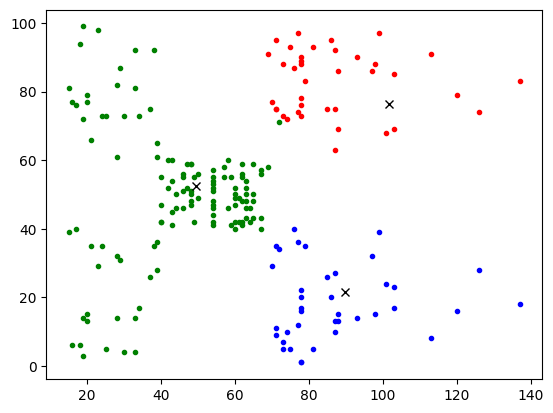

In [8]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data yang digunakan untuk klasterisasi adalah fitur "Annual Income (k$)" dan "Spending Score (1-100)"
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
print('Data:\n', X)

# Pemanggilan fungsi som() dengan parameter yang sesuai
centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=10, n_cluster=3)
print('centroid terbaru:\n', centroids)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)

# Fungsi draw() harus diimplementasikan atau diimpor
draw(X, labels, centroids)


 Kita tidak menggunakan akurasi untuk menilai kinerja clustering, melainkan silhouette score. Silhouette score adalah metrik yang digunakan untuk menghitung seberapa baik pengelompokan/clustering. Nilainya berkisar antara -1 hingga 1. dengan detail sebagai berikut.

-  1: cluster berjauhan satu sama lain dan dapat dibedakan dengan jelas.

-  0 : Berarti cluster bersifat indifferent, atau dapat dikatakan jarak antar cluster tidak signifikan.

-  -1: Berarti cluster dikelompokkan dengan cara yang salah.

<br>

**Pertanyaan**

1. Carilah learning rate, b, dan max epoch yang sesuai dan menghasilkan hasil clustering yang cukup baik!

2. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate, b, dan max epox yang di masukkan!

Jawaban:

1. Pada eksperimen pertama dengan menggunakan learning rate 0,1, b 0,5, dan max epoch 10, menghasilkan nilai silhouette 0,46365836994132326. Sedangkan, pada eksperimen kedua dengan menggunakan learning rate 0, b 0,2, dan max epoch 3, menghasilkan nilai silhouette 0,29151442069748107.

2. Pada eksperimen kedua, nilai silhouette yang dihasilkan lebih besar daripada nilai silhouette pada eksperimen pertama. Hal ini menunjukkan bahwa klasterisasi yang dihasilkan pada eksperimen kedua lebih baik daripada klasterisasi yang dihasilkan pada eksperimen pertama.

- Learning rate adalah parameter yang mengontrol seberapa besar bobot unit SOM diperbarui selama pelatihan. Nilai learning rate yang lebih tinggi memungkinkan bobot untuk diperbarui dalam langkah yang lebih besar, yang dapat mengarah pada konvergensi lebih cepat.

- b adalah parameter yang mengendalikan seberapa besar area di sekitar unit pemenang yang akan diperbarui selama pelatihan. Nilai yang lebih besar akan mencakup unit-unit yang lebih jauh dari pemenang, yang dapat menghasilkan klaster yang lebih luas dan kasar. Nilai yang lebih kecil akan mencakup unit yang lebih dekat dengan pemenang, menghasilkan klaster yang lebih tajam.

- max epoch adalah parameter yang mengontrol berapa lama proses pelatihan akan berlangsung. Lebih banyak epoch memberikan lebih banyak iterasi pelatihan, yang dapat membantu meningkatkan kualitas klaster. Namun, jika jumlah epoch terlalu besar, itu dapat mengakibatkan overfitting atau memperlambat pelatihan.

#**Post Test Bab 7 Learning Vector Quantization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def lvq_fit(train, target, lrate, b, max_epoch):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min = np.argmin(distance)
      sign = 1 if target[i] == label[min] else -1
      weight[min] += sign * lrate * (x - weight[min])
    lrate *= b
    epoch += 1

  return weight, label

### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

### c) Fungsi Hitung Akurasi

In [ ]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 0.8571428571428571


<ipython-input-59-972d1dfa3958>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


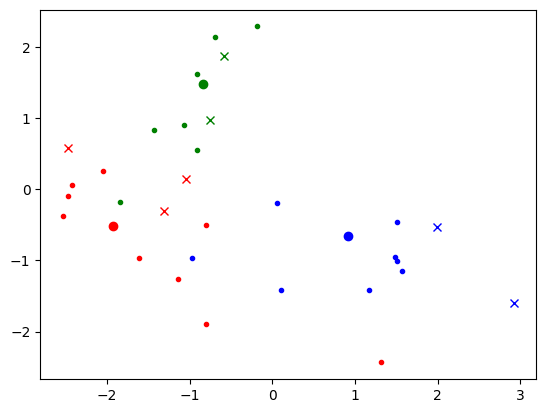

In [ ]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

## Post-test

Pada post-test kali ini, teman-teman akan menggunakan Hand-written MNIST. Teman-teman harus bisa membangun model LVQ yang mampu mengklasifikasikan citra tulisan tangan ke bentuk sebenarnya.

**Unduh dataset dari google drive**

In [ ]:
!gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

**Representasi file csv ke citra asli**

In [ ]:
data = pd.read_csv('data.csv')
data.head()

Teman-teman pada kali ini hanya diminta untuk melakukan klasifikasi 2 kelas. Hapus semua baris yang tidak berlabel 1 dan 2!

In [ ]:
# Hapus semua kelas, kecuali kelas 1 dan 2, simpan ke variabel data_lite
data_lite =


data_lite.head()

In [ ]:
selected = data_lite.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [ ]:
target = data_lite.iloc[:, 0]  # Kolom pertama adalah kolom kelas/target
data = data_lite.iloc[:, 1:]   # Sisanya adalah data


# Konversi data dan target ke dalam array NumPy, simpan ke variabel X dan y
X =
y =

Lakukan pelatihan menggunakan X_train dan uji dengan X_test. Set parameter lainnya agar teman-teman mendapatkan akurasi > 0,9.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #jangan ubah baris ini

model = lvq_fit(X_train, y_train, lrate=..., b=..., max_epoch=...)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

print('Accuracy:', accuracy)

<ipython-input-59-972d1dfa3958>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


Accuracy: 0.9331797235023042


### Pertanyaan

1.  Bagaimana arsitektur LVQ yang dibangun? Jelaskan jumlah input neuron dan output neuronnya!
2.  Bagaimana proses pelatihan LVQ agar bisa mencapai akurasi > 0,9? Jelaskan hasil tuning hyperparameternya!

Jawaban

1.  asdfg
2.  asdfg

#**Post Test Bab 8 Backpropagation I & Bab 9 Backpropagation II**

In [ ]:
import numpy as np
import pandas as pd
import time

Pada post-test kali ini akan membandingkan dua jenis fungsi aktivasi yang biasa digunakan dalam backpropogation

In [ ]:
#Fungsi Aktivasi Sigmoid dengan turunannya

#Fungsi Aktivasi Hyperbolic Tangent dengan turunannya


In [ ]:
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)

  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1

  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

### a) Fungsi *Training* Backpropagation

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def bp_fit_sig(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
  start_time = time.time()
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else
  np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1
  for i in range(0, len(n)-1):
    n[i][-1] = 1
  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]
      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])
      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])
      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))
      for L in range(len(layer_conf) - 1, 1, -1):
        din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))
      w += dw
    mse /= len(X)
    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')
  execution = time.time() - start_time
  print("Waktu eksekusi: %s detik" % execution)
  return w, epoch, mse

In [ ]:
#Membuat fungsi training backpropagation dengan menggunakan fungsi aktivasi tanh
def bp_fit_tanh(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):


### b) Fungsi *Testing* Backpropagation

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def bp_predict_sig(X, w):
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []
  n.append(np.empty(len(w[-1][0])))
  for x in X:
    n[0][:-1] = x
    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])
    predict.append(n[-1].copy())
  return predict

In [ ]:
#Membuat fungsi testing backpropagation dengan menggunakan fungsi aktivasi tanh
def bp_predict_tanh(X, w):

### c) Klasifikasi dataset wine


Lakukan pelatihan pada dataset wine dengan menggunakan 2 fungsi pelatihan yang telah dibuat!

Konfigurasi kedua pelatihan harus sama (epoch, hidden layer, learning rate, dll).
Akurasi yang diharapkan di setiap pelatihan adalah > 0.98

In [ ]:
import numpy as np

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = minmax_scale(wine.data)
Y = onehot_enc(wine.target)

X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=.3,random_state=1)
#Isi jumlah layer yang digunakan dengan jumlah hidden layer 5
w, ep, mse = bp_fit_sig(X_train, y_train, layer_conf=(.., .., ..),
                        learn_rate=.., max_epoch=.., max_error=.., print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict_sig(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

Epoch 25, MSE: 0.6400740659726653
Epoch 50, MSE: 0.2884590006081003
Epoch 75, MSE: 0.10567045260837174
Waktu eksekusi: 1.2340588569641113 detik
Epochs: 78, MSE: 0.09742138726986903
Output: [2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0]
True : [2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0]
Accuracy: 0.9814814814814815


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = minmax_scale(wine.data)
Y = onehot_enc(wine.target)

X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=.3,random_state=1)
#Isi jumlah layer yang digunakan dengan jumlah hidden layer #
w, ep, mse = bp_fit_tanh(X_train, y_train, layer_conf=(.., .., ..),
learn_rate=.., max_epoch=.., max_error=.., print_per_epoch=..)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict_tanh(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

Epoch 25, MSE: 0.11605169572285873
Waktu eksekusi: 0.47411632537841797 detik
Epochs: 32, MSE: 0.09877634665107414
Output: [2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0]
True : [2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0]
Accuracy: 1.0


## Pertanyaan

1.  Apa perbedaan dari penggunaan fungsi aktivasi sigmoid dengan fungsi aktivasi hyperbolic tangent?
2. Coba jelaskan alasan dari perbedaan tersebut sebisa kalian

## Jawaban

1.  

2.  

#**Post Test Bab 10 Extreme Learning Machine**

Dalam bab ini, praktikan diharapkan memahami implementasi model ELM. Praktikan harus mampu membangun model ELM dan Backpropagation, serta melakukan analisis dan perbandingan hasil dari kedua model tersebut.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

Dataset yang digunakan adalah dataset MNIST yang memiliki 28x28 piksel gambar dan 10 label kelas.

In [10]:
!gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

Downloading...
From: https://drive.google.com/uc?id=1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA
To: /content/data.csv
100% 18.3M/18.3M [00:00<00:00, 34.3MB/s]


In [11]:
df = pd.read_csv('data.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Hapus semua kelas, kecuali kelas 1 dan 2
data = df[(df['label'] == 1) | (df['label'] == 2)]
data.reset_index(drop=True, inplace=True)
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


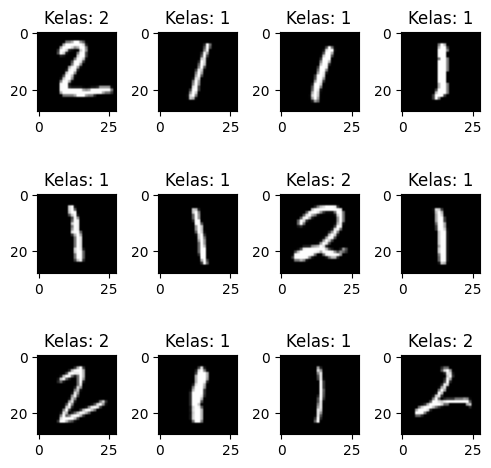

In [14]:
selected = data.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

### Fungsi *Training* ELM

Lengkapi kode dalam cell di bawah ini:

In [15]:
def elm_fit(X, target, h, W=None):
    start_time = time.time()

    # Inisialisasi bobot acak jika tidak disediakan
    if W is None:
        W = np.random.uniform(-.1, .1, (h, len(X[0])))

    # Hitung keluaran hidden layer
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))

    # Ubah urutan keluaran hidden layer
    Ht = H.T

    # Pseudo-invers dari keluaran transposed hidden layer
    Hp = np.linalg.inv(Ht @ H) @ Ht

    # Hitung bobot keluaran
    beta = Hp @ target

    # Hitung prediksi keluaran
    y =  H @ beta

    # Hitung Mean Squared Error
    mse = np.mean((y-target)**2)

    # Hitung waktu eksekusi
    execution = time.time()- start_time
    print("Waktu eksekusi: %s detik" % execution)

    # Mengembalikan bobot, bobot keluaran, dan MSE
    return W, beta, mse

### Fungsi *Testing* ELM

Lengkapi kode dalam cell di bawah ini:

In [16]:
def elm_predict(X, W, b, round_output=False):
    # Hitung keluaran layer output
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))

    # Hitung prediksi keluaran
    y = H @ b

    # Secara opsional membulatkan nilai keluaran
    if round_output:
        y = [int(round(x)) for x in y]

    # Mengembalikan hasil prediksi
    return y

### Implementasi Model ELM
Lengkapi kode dalam cell di bawah ini:

Ubahlah nilai pengaturan sebagai berikut:

a. Rasio data latih: 75% dan data uji: 25%

b. Jumlah hidden neuron: 10

In [17]:
X = minmax_scale(data.drop('label', axis=1).astype('float32'))
Y = data['label'].astype('int')

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=42)

# Latih model ELM
W, b, mse = elm_fit(X_train, y_train, 10)
print('MSE:', mse)

# Buat prediksi pada set tes
output = elm_predict(X_test, W, b, round_output=True)

# Hitung dan cetak akurasi
accuracy = accuracy_score(output, y_test)
print('Output:', output)
print('True   :', y_test)
print('Accuracy:', accuracy)


Waktu eksekusi: 0.008369207382202148 detik
MSE: 0.0767199163437563
Output: [3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 

### Fungsi *Training* Backpropagation


In [18]:
import numpy as np
def sig(x):
    return 1 / (1 + np.exp(-x))

def sigd(x):
    return sig(x) * (1 - sig(x))

def onehot_enc(lbl, min_val=0):
    mi = min(lbl)
    enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
    for i, x in enumerate(lbl):
      enc[i, x - mi] = 1
    return enc

def onehot_dec(enc, mi=0):
    return [np.argmax(e) + mi for e in enc]

In [19]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
    start_time = time.time()
    np.random.seed(1)
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j+1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i+1]) for i in range(len(layer_conf) - 1)], dtype=object)
    dw = np.array([np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)], dtype=object)
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]
    epoch = 0
    mse = 1

    for i in range(0, len(n)-1):
        n[i][-1] = 1

    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0
        for r in range(len(X)):
            n[0][:-1] = X[r]

            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L-1], w[L-1])
                n[L][:len(nin[L])] = sig(nin[L])

            e = target[r] - n[-1]
            mse += sum(e ** 2)
            d[-1] = e * sigd(nin[-1])
            dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

            for L in range(len(layer_conf) - 1, 1, -1):
                din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
                d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
                dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

            w += dw
        mse /= len(X)

        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

    execution = time.time()- start_time
    print("Waktu eksekusi: %s detik" % execution)

    return w, epoch, mse

### b) Fungsi *Testing* Backpropagation


In [20]:
def bp_predict(X, w):
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []
    n.append(np.empty(len(w[-1][0])))
    for x in X:
      n[0][:-1] = x
      for L in range(0, len(w)):
        nin[L] = np.dot(n[L], w[L])
        n[L + 1][:len(nin[L])] = sig(nin[L])
      predict.append(n[-1].copy())
    return predict

### Implementasi Model Backpropagation
Lengkapi kode dalam cell di bawah ini:
Ubahlah nilai pengaturan sebagai berikut:

a. Rasio data latih: 75% dan data uji: 25%

b. Jumlah hidden neuron: 10

c. Max epoch = 100

d. Learning rate = 0.1

e. Max error = 0.5

In [21]:
x = minmax_scale(data.drop('label', axis=1).astype('float32'))
y = data['label'].astype('int')

X = minmax_scale(x)
Y = onehot_enc(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.25,random_state=42)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(784, 10, 2),learn_rate=0.1, max_epoch=100, max_error=0.5, print_per_epoch=25)

predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Epochs:', ep)
print('MSE:', mse)
print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

Epoch 25, MSE: 0.5183800253960992
Epoch 50, MSE: 0.5183800253876577
Epoch 75, MSE: 0.518380025379221
Epoch 100, MSE: 0.5183800253707906
Waktu eksekusi: 24.36007523536682 detik
Epochs: 100
MSE: 0.5183800253707906
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Pertanyaan
1. Jelaskan proses membagi data menjadi set pelatihan dan pengujian untuk pelatihan . Mengapa langkah ini diperlukan?
2. Bagaimana proses penyesuaian bobot dilakukan dalam Extreme Learning Machine (ELM) dibandingkan dengan algoritma Backpropagation?
3. Bagaimana perbandingan dari hasil dua model diatas? Jelaskan perbedaan, kelebihan, dan kekurangan berdasarkan hasil yang diterima!

# Jawaban

1.
Proses membagi data menjadi set pelatihan (training set) dan set pengujian (testing set) adalah langkah penting dalam machine learning untuk evaluasi dan pelatihan model. Tujuan utama dari proses ini adalah untuk menguji kinerja model yang telah dilatih pada data yang belum pernah dilihat sebelumnya. Ini membantu dalam mengukur seberapa baik model dapat melakukan generalisasi pada data baru yang belum pernah dilihat selama proses pelatihan.

2.

A. ELM :
Penyesuaian Bobot:
1. Bobot antara hidden layer dan output layer (bobot output) adalah bagian yang disesuaikan dalam ELM.
2. Setelah inisialisasi bobot, ELM menggunakan pendekatan analitis untuk menghitung bobot output secara langsung tanpa iterasi atau proses penyesuaian berkelanjutan yang membutuhkan backpropagation.
3. Bobot output dihitung menggunakan pseudo-invers dari keluaran transposed hidden layer dan target output. Ini dapat dihitung secara langsung tanpa iterasi berkelanjutan, karena tidak ada perubahan pada bobot di antara hidden layer dan input layer.

B. Backpropagation
Penyesuaian Bobot:
1. Backpropagation menggunakan metode iteratif yang melibatkan proses maju (forward pass) dan mundur (backward pass) untuk menghitung gradien dari fungsi biaya terhadap bobot dan kemudian menyesuaikan bobot secara berurutan menggunakan gradien ini.
2. Pada setiap iterasi, prediksi model dibandingkan dengan target yang sebenarnya, dan gradien dari fungsi biaya dihitung menggunakan aturan rantai (chain rule) dari kalkulus. Bobot diperbarui dengan mengurangi gradien dari fungsi biaya dengan langkah pembelajaran (learning rate) yang ditentukan.


3.
Dua pendekatan utama dalam machine learning, yaitu Extreme Learning Machine (ELM) dan Backpropagation (BP), memberikan hasil yang berbeda dalam evaluasi performa model pada dataset yang sama. Dalam kasus ini, ELM menunjukkan performa yang lebih unggul dengan akurasi sebesar 0.746 dan MSE sekitar 0.179, sedangkan BP menghasilkan akurasi sekitar 0.509 dengan MSE sekitar 0.515. ELM, dengan pendekatan analitis langsung, menunjukkan kemampuan yang lebih baik dalam memprediksi dengan tepat dan mengurangi kesalahan prediksi pada data pengujian. Kelebihan ELM terletak pada kecepatan pelatihan dan performa yang baik dalam tugas prediksi, namun tidak mendukung pembelajaran mendalam. Di sisi lain, BP, meskipun membutuhkan waktu pelatihan yang lebih lama karena iterasi berkelanjutan, cocok untuk pembelajaran mendalam dan dapat menyesuaikan model secara iteratif berdasarkan gradien untuk peningkatan performa yang berkelanjutan. Pemilihan antara ELM dan BP bergantung pada konteks dan kebutuhan spesifik, di mana ELM mungkin lebih dipilih untuk kinerja cepat dan tugas prediksi, sementara BP lebih cocok untuk tugas yang memerlukan tingkat fleksibilitas dan detail yang lebih tinggi dalam pembelajaran model.